  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1  
<class '

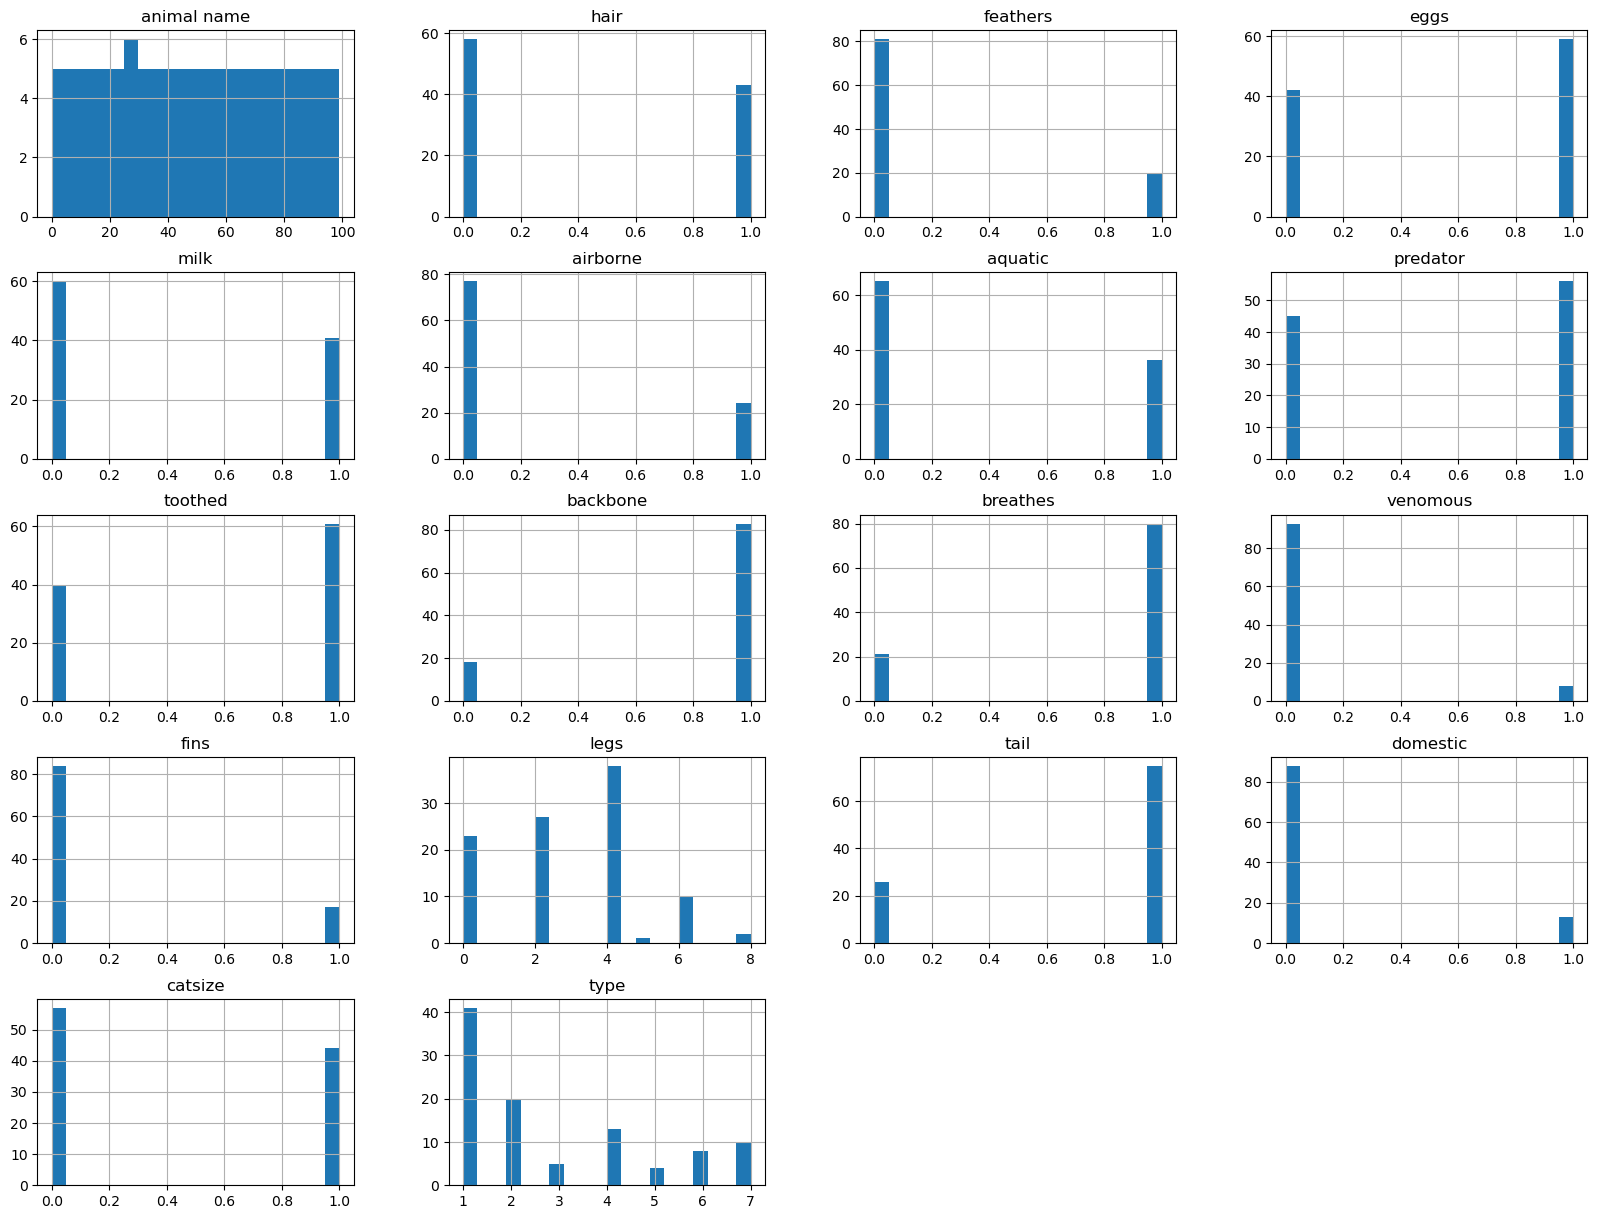

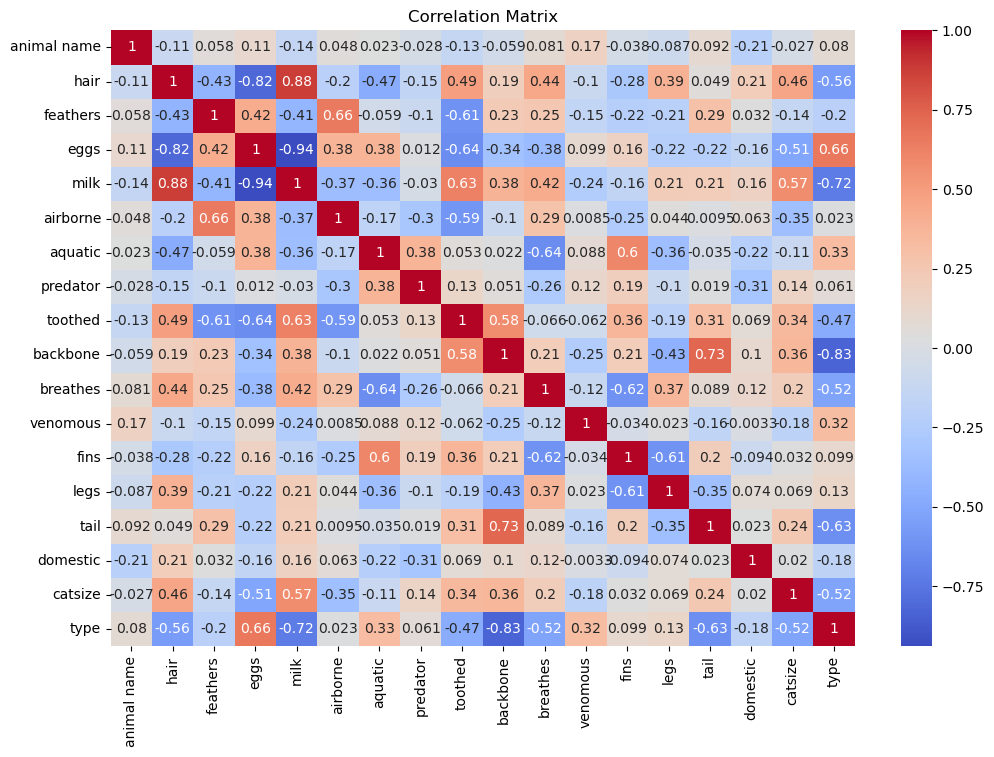

The 'label' column does not exist in the DataFrame.


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from mlxtend.plotting import plot_decision_regions

# Load the dataset
df = pd.read_csv('/Users/kirtisailinaidu/Documents/Data Science Assignment/XGBM & LGBM/KNN/Zoo.csv')

# Task 1: Analyse the data using visualizations
# Display the first few rows of the dataset
print(df.head())

# Display dataset info
print(df.info())

# Display dataset summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Encode all categorical variables
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

# Visualize the distributions of the features
df.hist(bins=20, figsize=(20, 15))
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Task 2: Preprocess the data
# Handle missing values (if any)
df.fillna(df.mean(), inplace=True)  # Example method

# Handle outliers (if any) using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Check if the 'label' column still exists before dropping it
if 'label' in df.columns:
    # Separate features and labels
    X = df.drop('label', axis=1)
    y = df['label']

    # Normalize the data
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Task 3: Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Task 4: Implement the K-Nearest Neighbours algorithm
    # Task 5: Choose an appropriate distance metric and value for K
    k = 5  # Example value for K
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn.predict(X_test)

    # Task 6: Evaluate the classifier's performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Visualize the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Task 7: Visualize the decision boundaries
    # Reduce to 2D for visualization if more than 2 features are present
    X_vis = X_train[:, :2]  # Use first two features for visualization
    knn_vis = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_vis.fit(X_vis, y_train)

    # Plot decision regions
    plot_decision_regions(X_vis, y_train, clf=knn_vis, legend=2)
    plt.title(f'KNN Decision Boundary (k={k})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
else:
    print("The 'label' column does not exist in the DataFrame.")
